<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [15]:
# insert code here
import numpy as np
import pandas as pd

# Load the diabetes dataset from sklearn
from sklearn import datasets

%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow

In [16]:
from tensorflow import keras

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [17]:
## Load the Diabetes dataset
diabetes = datasets.load_diabetes()
datasets.load_diabetes()

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [18]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

# Prepare input data

In [19]:
diabetes.data #It's a dictionary

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [20]:
column_names= diabetes.feature_names

In [21]:
X=pd.DataFrame(data=diabetes.data, columns=column_names)

In [22]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


bp-average blood pressure, s1-tc, T-Cells (a type of white blood cells), s2-ldl, low-density lipoproteins, s3-hdl, high-density lipoproteins, s4-tch, thyroid stimulating hormone, s5-ltg, lamotrigine, s6-glu, blood sugar level

In [23]:
y = diabetes.target
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [29]:
# #input
X = diabetes.data
n_cols = X.shape[1]
# # output
y = target = diabetes.target


### Split the data (training/test)

In [30]:
# Create Model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create the model's architecture

In [32]:
# insert code here
model = keras.models.Sequential()

# Add the first hidden layer
model.add(keras.layers.Dense(100, activation = 'relu', input_shape = (n_cols,)))
# Add the second hidden layer
model.add(keras.layers.Dense(50, activation = 'relu'))

# Add the output layer
model.add(keras.layers.Dense(10, activation = 'linear'))

In [33]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1100      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 6,660
Trainable params: 6,660
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [34]:
# insert code here
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [35]:
%%time
# insert code here
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,
    batch_size = 20,
    epochs = 100,
    verbose = 1)

Epoch 1/100
13/13 [==============================] - 1s 10ms/step - loss: 28650.4453 - mse: 28650.4453 - val_loss: 31329.9570 - val_mse: 31329.9551
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 28624.0508 - mse: 28624.0508 - val_loss: 31290.0059 - val_mse: 31290.0059
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 28570.7090 - mse: 28570.7090 - val_loss: 31208.3516 - val_mse: 31208.3516
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 28464.0039 - mse: 28464.0039 - val_loss: 31048.5723 - val_mse: 31048.5723
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 28268.5996 - mse: 28268.5996 - val_loss: 30762.1406 - val_mse: 30762.1406
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 27929.2129 - mse: 27929.2129 - val_loss: 30302.0840 - val_mse: 30302.0840
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 27396.0879 - mse: 27396.0879 - val_loss: 295

### Create predictions

In [38]:
# insert code here
predictions = model.predict(X_test)

### Evaluate the model

In [46]:
score = model.evaluate(X_test, y_test)
rmse = score[0] ** 0.5
print('mse = '+ str(score))
print('rmse = '+ str(rmse))

4/4 [==============================] - 0s 1ms/step - loss: 3102.6077 - mse: 3102.6077
mse = [3102.607666015625, 3102.607666015625]
rmse = 55.70105623788139


### Visualisation of cost

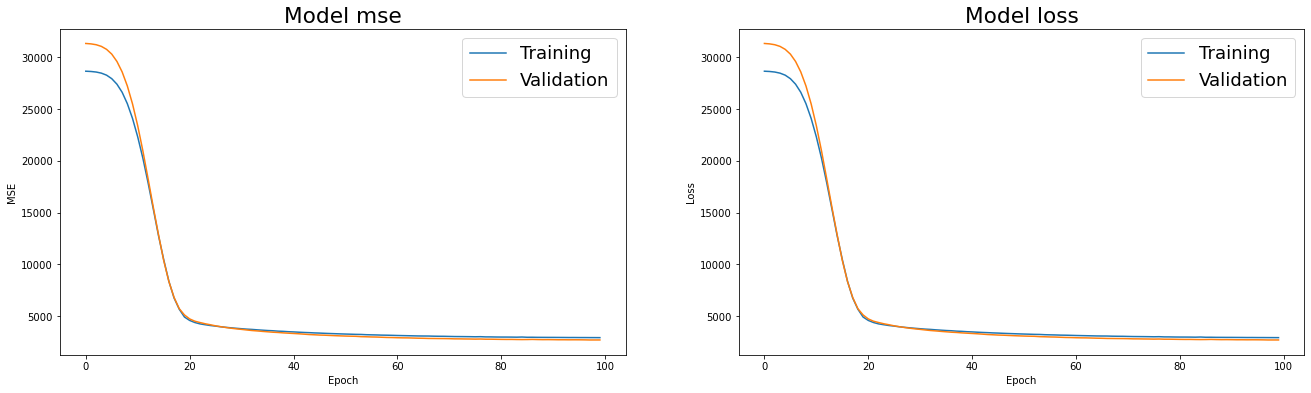

In [47]:
# insert code here
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model mse')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [ ]:
# insert code here



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



